## Proyecto Final

Fernando Molina &
Anthony Navarrete

## 1.- Procesamiento

In [10]:
#     IMPORTAMOS LAS LIBRERIAS QUE POSTERIORMENTE VAMOS A USAR.
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Procedemos a cargar la base de datos desde el archivo XLSX
data = pd.read_excel('PublicHospitalDataset.xlsx')

# Mostramos información general sobre la base de datos
print("Información general sobre la base de datos:")
print(data.info())

# Mostramos las primeras filas de la base de datos
print("\nPrimeras filas de la base de datos:")
print(data.head())

# Describimos la base de datos (tamaño, tipos de datos, estadísticas descriptivas)
print("\nDescripción de la base de datos:")
print(data.describe())

# Identificamos valores nulos o en blanco
print("\nValores nulos o blancos en la base de datos:")
print(data.isnull().sum())


Información general sobre la base de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5112 non-null   int64  
 1   Heart Disease      5112 non-null   object 
 2   Married            5112 non-null   object 
 3   Work               5112 non-null   object 
 4   Residence          5112 non-null   object 
 5   Avg_glucose_level  5112 non-null   float64
 6   Bmi                4911 non-null   float64
 7   Smoking            5112 non-null   object 
 8   Gender             5112 non-null   object 
 9   Age                5112 non-null   float64
 10  Income             5085 non-null   float64
 11  Children           5112 non-null   int64  
 12  Stroke             5112 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 519.3+ KB
None

Primeras filas de la base de datos:
   Hypertension Heart D

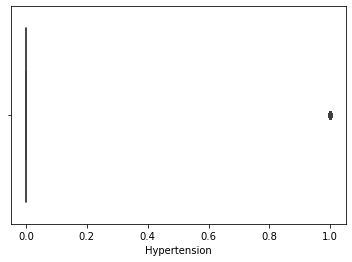

Índices de valores atípicos: [   4    6   10   15   17   21   30   32   35   37   44   45   49   51
   53   58   59   61   62   65   69   71   72   76   83   93   98  106
  115  116  121  123  126  130  131  132  134  138  142  143  144  148
  159  163  164  167  168  171  173  175  177  184  187  191  193  196
  201  208  217  218  220  229  233  238  243  247  250  258  269  270
  281  297  314  317  326  331  350  355  360  382  386  396  399  411
  426  439  444  457  466  467  468  479  505  530  565  571  577  594
  599  651  654  666  668  680  688  689  700  713  715  744  751  759
  782  786  788  816  821  826  829  841  849  871  882  888  890  894
  897  928  944  964  970  990 1000 1013 1031 1058 1062 1067 1075 1077
 1106 1114 1116 1125 1151 1161 1166 1183 1188 1189 1199 1213 1225 1240
 1245 1250 1283 1293 1294 1306 1315 1322 1325 1343 1350 1384 1409 1412
 1423 1458 1466 1472 1473 1485 1487 1490 1491 1503 1516 1531 1543 1546
 1554 1561 1562 1577 1588 1607 1617 1627 1650 16

In [12]:
# Visualizamos una grafica de bloque de una columna específica para identificar valores atípicos
sns.boxplot(x=data['Hypertension'])
plt.show()

# Calculamos el Z-score para identificar valores atípicos

z_scores = np.abs(stats.zscore(data['Hypertension']))
threshold = 3 # Umbral típico para identificar valores atípicos
outliers = np.where(z_scores > threshold)

print("Índices de valores atípicos:", outliers[0])
print("Valores atípicos:", data['Hypertension'].iloc[outliers[0]])

In [13]:

#1.2 Detallar el criterio empleado para manejo de valores nulos y/o atípicos (si aplica): ¿qué se hizo
#con ellos?, ¿cómo los gestionaron?, etc

#LIMPIAMOS LOS VALORES NULO, EN BLANCO O ATIPICOS

""" --- PARA LA COLUMNA BMI VAMOS A TOMAR COMO CRITERIO DE REMPLAZO CON LA MEDIA EL DATO QUE SEA NULO
    --- O INCONSISTENTE...
"""

# Calculamos la media de la columna 'Bmi' excluyendo los valores atípicos
bmi_mean = data[(pd.notnull(data['Bmi'])) & (data['Bmi'] < 100)]['Bmi'].mean()

# Reemplazar los valores NaN y el valor atípico en la columna 'bmi' con la media calculada
data['Bmi'] = data['Bmi'].apply(lambda x: bmi_mean if pd.isnull(x) or x >= 100 else x)

# Verificar que no haya más valores NaN o atípicos en la columna 'Bmi' después de la corrección
print("Valores NaN o atípicos en la columna 'Bmi' después de la corrección:")
print(data[data['Bmi'].isnull() | (data['Bmi'] >= 100)]['Bmi'])

#   PARA LA COLUMNA ---Heart Disease---

# Convertir 'Yes' a 1 y 'No' a 0 en la columna 'Heart Disease'
data['Heart Disease'] = data['Heart Disease'].replace({'Yes': 1, 'No': 0})

# Verificamos que la columna "Heart Disease" contenga solo valores 0 o 1
print("Valores únicos en la columna 'Heart Disease':", data['Heart Disease'].unique())

#   PARA LA COLUMNA   --- INCOME ---

data = data[pd.to_numeric(data['Income'], errors='coerce').notna()]
data = data.dropna()



Valores NaN o atípicos en la columna 'Bmi' después de la corrección:
Series([], Name: Bmi, dtype: float64)
Valores únicos en la columna 'Heart Disease': [1 0]


In [29]:
def eliminar_filas_categorias_atipicas(data, umbral):
    # Obtenemos solo las columnas categóricas
    columnas_categoricas = data.select_dtypes(include=['object']).columns
    
    # Creamos una copia del DataFrame original
    data_filtrado = data.copy()
    
    # Iteramos sobre cada columna categórica
    for columna in columnas_categoricas:
        # Calculamos la frecuencia de cada categoría
        frecuencia_categoria = data[columna].value_counts()
        
        # Identificamos categorías con frecuencia por debajo del 5% de frecuencia denominadas como atípicas
        categorias_atipicas = frecuencia_categoria[frecuencia_categoria < umbral].index.tolist()
        
        # Eliminamos las filas que contienen categorías atípicas en esta columna
        data_filtrado = data_filtrado[~data_filtrado[columna].isin(categorias_atipicas)]
    
    return data_filtrado

# Llamamos a la función con el DataFrame y el umbral deseado de un 5%
data = eliminar_filas_categorias_atipicas(data, 5)


In [30]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hypertension             5075 non-null   float64
 1   Heart Disease            5075 non-null   float64
 2   Avg_glucose_level        5075 non-null   float64
 3   Bmi                      5075 non-null   float64
 4   Age                      5075 non-null   float64
 5   Income                   5075 non-null   float64
 6   Children                 5075 non-null   float64
 7   Stroke                   5075 non-null   float64
 8   Married_No               5075 non-null   float64
 9   Married_Yes              5075 non-null   float64
 10  Work_Govt_job            5110 non-null   float64
 11  Work_Never_worked        5110 non-null   float64
 12  Work_Private             5110 non-null   float64
 13  Work_Self-employed       5110 non-null   float64
 14  Work_children           

1.3 ANALICE LA CORRELACIÓN ENTRE VARIABLES PREDICTIVAS. ¿CUÁLES VARIABLES PARECEN AFECTAR A LA VARIABLE RESPUESTA?

Columnas numéricas seleccionadas: Index(['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Bmi', 'Age',
       'Income', 'Children', 'Stroke', 'Married_No', 'Married_Yes',
       'Work_Govt_job', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Work_nan', 'Residence_Rural',
       'Residence_Urban', 'Residence_nan', 'Smoking_Unknown',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Smoking_nan', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Gender_nan'],
      dtype='object')


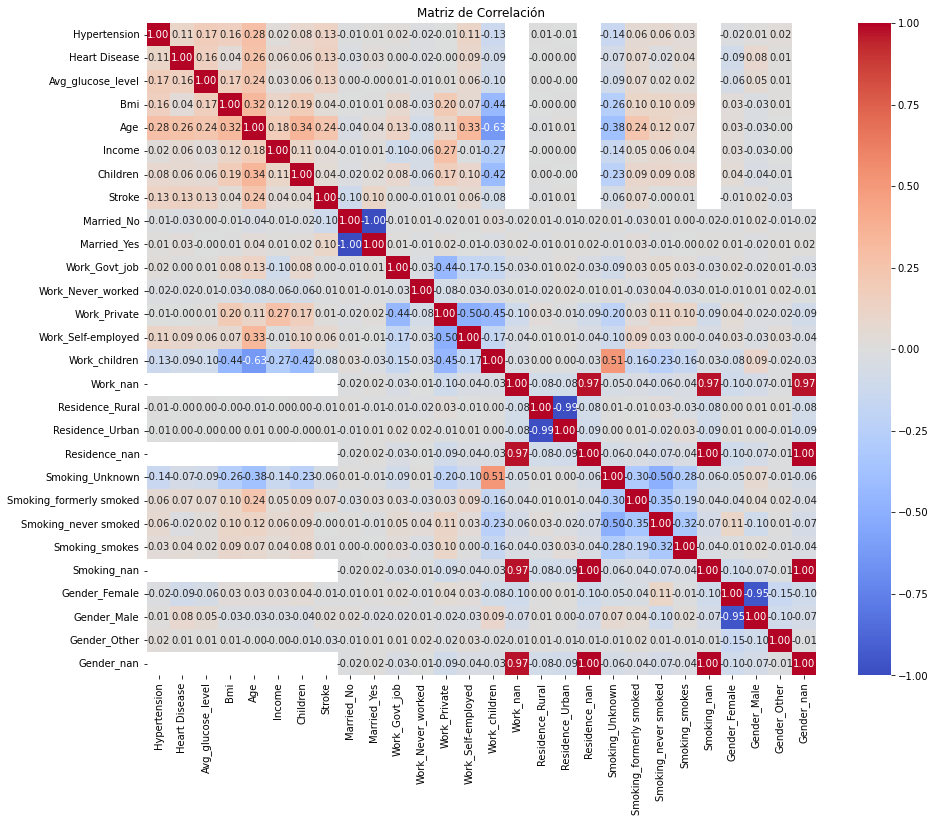

In [32]:
# Seleccionamos solo las columnas numéricas para el cálculo de la matriz de correlación
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
print("Columnas numéricas seleccionadas:", numeric_columns)

# Calculamos la matriz de correlación solo con las columnas numéricas
correlation_matrix = data[numeric_columns].corr()

# Visualizamos la matriz de correlación como un mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


1.4 VISUALIZACIÓN DE DATOS: VISUALICE TODAS LAS VARIABLES PREDICTIVAS Y DESCRIBA SU DISTRIBUCIÓN. ANALICE LA DISTRIBUCIÓN DE LA VARIABLE RESPUESTA.

ValueError: num must be 1 <= num <= 8, not 9

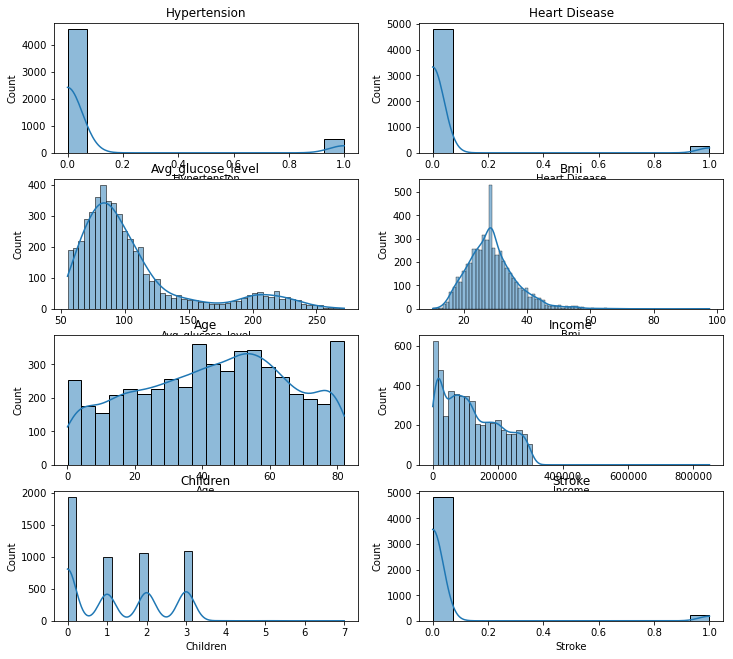

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para variables numéricas
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(12, 11))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Gráficamos las barras para variables categóricas con porcentaje de respuestas
categorical_columns = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 11))
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=45)
    
    # Calcular y mostrar los porcentajes en cada barra
    total_count = len(data[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 10, f'{height / total_count:.1%}', ha='center')

plt.tight_layout()
plt.show()

# Histograma para la variable respuesta (Stroke)
plt.figure(figsize=(6, 6))
sns.histplot(data['Stroke'], kde=True)
plt.title('Distribución de la Variable Respuesta (Stroke)')
plt.ylim(0, 5000)
plt.show()


    3.  DIVIDA LA BASE DE DATOS EN UN SET DE ENTRENAMIENTO, UN SET DE VALIDACIÓN Y UN SET DE PRUEBA.
        JUSTIFIQUE EN BASE A LA LITERATURA EL PORCENTAJE DE DATOS QUE SE VA A CADA SET.

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Seleccionamos las columnas que son variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Creamos una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Iteramos sobre cada columna categórica
for column in categorical_columns:
    # Ajustamos y transformamos los datos de la columna actual
    encoded_data = encoder.fit_transform(data[[column]])
    
    # Creamos un nuevo DataFrame con las columnas codificadas
    data_encoded = pd.DataFrame(encoded_data.toarray(), columns=[f"{column}_{category}" for category in encoder.categories_[0]])
    
    # Concatenamos el DataFrame codificado al DataFrame original
    data = pd.concat([data.drop(column, axis=1), data_encoded], axis=1)

print(data)


      Hypertension  Heart Disease  Avg_glucose_level        Bmi   Age  \
0              0.0            1.0             228.69  36.600000  67.0   
1              0.0            0.0             202.21  28.892888  61.0   
2              0.0            1.0             105.92  32.500000  80.0   
3              0.0            0.0             171.23  34.400000  49.0   
4              1.0            0.0             174.12  24.000000  79.0   
...            ...            ...                ...        ...   ...   
5107           0.0            0.0              82.99  30.600000  35.0   
5108           0.0            0.0             166.29  25.600000  51.0   
5109           0.0            0.0              85.28  26.200000  44.0   
5110           1.0            0.0              90.51  31.000000  33.0   
5111           0.0            0.0              90.53  21.000000  34.0   

        Income  Children  Stroke  Married_No  Married_Yes  ...  Residence_nan  \
0     725445.0       3.0     1.0         0

    ---- Modelo usado para la predicción RandomForestClassifier


AUC-ROC para el conjunto de datos original: 0.9467215256008359
AUC-ROC para submuestreo: 0.9404040404040405
AUC-ROC para sobremuestreo: 0.9450452803901079


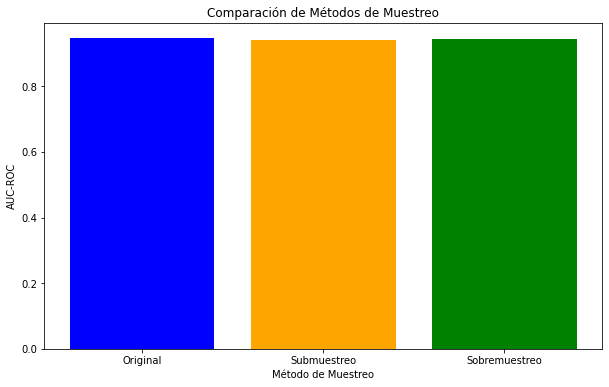

In [44]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Supongamos que ya tienes definidos X_train, X_test, y_test, y el clasificador rf_classifier

# Crear un imputador para llenar los valores NaN con la media
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Crear un codificador de etiquetas para convertir las etiquetas en enteros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_imputed)

# Entrenar el clasificador con las etiquetas codificadas
rf_classifier.fit(X_train, y_train_encoded)

# Crear un imputador para llenar los valores NaN en y_test con la media
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Crear un codificador de etiquetas para convertir las etiquetas imputadas en enteros
y_test_encoded = label_encoder.transform(y_test_imputed)

# Evaluar el rendimiento del clasificador en el conjunto de datos original
y_pred_proba_original = rf_classifier.predict_proba(X_test)
auc_roc_original = roc_auc_score(y_test_encoded, y_pred_proba_original, multi_class='ovo')

# Aplicar submuestreo y entrenar el clasificador en el conjunto de datos equilibrado
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train_encoded)
rf_classifier.fit(X_resampled, y_resampled)
y_pred_proba_under = rf_classifier.predict_proba(X_test)
auc_roc_under = roc_auc_score(y_test_encoded, y_pred_proba_under, multi_class='ovo')

# Aplicar sobremuestreo y entrenar el clasificador en el conjunto de datos equilibrado
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train_encoded)
rf_classifier.fit(X_resampled, y_resampled)
y_pred_proba_over = rf_classifier.predict_proba(X_test)
auc_roc_over = roc_auc_score(y_test_encoded, y_pred_proba_over, multi_class='ovo')

# Comparar el rendimiento de las dos técnicas con el rendimiento original
print("AUC-ROC para el conjunto de datos original:", auc_roc_original)
print("AUC-ROC para submuestreo:", auc_roc_under)
print("AUC-ROC para sobremuestreo:", auc_roc_over)

# Definimos los métodos y sus respectivos valores de AUC-ROC
metodos = ['Original', 'Submuestreo', 'Sobremuestreo']
auc_roc_values = [auc_roc_original, auc_roc_under, auc_roc_over]

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(metodos, auc_roc_values, color=['blue', 'orange', 'green'])

# Añadimos etiquetas y título
plt.xlabel('Método de Muestreo')
plt.ylabel('AUC-ROC')
plt.title('Comparación de Métodos de Muestreo')

# Mostramos el gráfico
plt.show()

In [48]:
# ----4. Test entrenamiento MEDIANTE algoritmo de Regresión Logística ----

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Preprocesamos los datos

# Eliminamos las filas con valores faltantes en y
data = data.dropna(subset=['Stroke'])

# Imputar valores faltantes en X con la media de la columna
imputer = SimpleImputer(strategy='mean')
X = data.drop('Stroke', axis=1)
X = imputer.fit_transform(X)

# Separamos las características y la variable objetivo
y = data['Stroke']  # Variable respuesta

# Escalamos las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para manejo del desbalance de clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividimos los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Seleccionamos el modelo
model = LogisticRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Reporte de clasificación:\n", classification_rep)

imputer = SimpleImputer(strategy='mean')
X = data.drop('Stroke', axis=1)
X = imputer.fit_transform(X)

Accuracy: 0.8055842812823164
Confusion Matrix:
 [[744 248]
 [128 814]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       992
         1.0       0.77      0.86      0.81       942

    accuracy                           0.81      1934
   macro avg       0.81      0.81      0.81      1934
weighted avg       0.81      0.81      0.81      1934



## 5 Algoritmos de Machine learning

## 5.1 Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define el modelo Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=15, criterion='gini')

# Entrena el modelo con el conjunto de datos de entrenamiento
random_forest.fit(X_train, y_train)

# Predice los valores de la variable respuesta para los conjuntos de datos de entrenamiento, validación y prueba
y_train_pred_rf = random_forest.predict(X_train)
y_val_pred_rf = random_forest.predict(X_val)
y_test_pred_rf = random_forest.predict(X_test)

# Calcula la precisión del modelo en los conjuntos de datos de entrenamiento, validación y prueba
train_acc = accuracy_score(y_train, y_train_pred_rf)
val_acc = accuracy_score(y_val, y_val_pred_rf)
test_acc = accuracy_score(y_test, y_test_pred_rf)

# Imprime los detalles
print("Precisión en el conjunto de datos de entrenamiento:", train_acc)
print("Precisión en el conjunto de datos de validación:", val_acc)
print("Precisión en el conjunto de datos de prueba:", test_acc)


Precisión en el conjunto de datos de entrenamiento: 0.9908620689655172
Precisión en el conjunto de datos de validación: 0.9446742502585316
Precisión en el conjunto de datos de prueba: 0.9467425025853154


## 5.2 VSM

In [61]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Crea un modelo SVM y ajustalo al conjunto de datos de entrenamiento
modelo = svm.SVC(kernel='linear')
modelo.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de datos de entrenamiento
y_pred_train_svm = modelo.predict(X_train)
precision_entrenamiento = accuracy_score(y_train, y_pred_train_svm)
print("Precisión en el conjunto de entrenamiento: ", precision_entrenamiento)

# Evalúa el modelo en el conjunto de datos de validación
y_pred_val_svm = modelo.predict(X_val)
precision_validacion = accuracy_score(y_val, y_pred_val_svm)
print("Precisión en el conjunto de validación: ", precision_validacion)

# Evalúa el modelo en el conjunto de datos de prueba
y_pred_test_svm = modelo.predict(X_test)
precision_prueba = accuracy_score(y_test, y_pred_test_svm)
print("Precisión en el conjunto de prueba: ", precision_prueba)


Precisión en el conjunto de entrenamiento:  0.8118965517241379
Precisión en el conjunto de validación:  0.8061013443640124
Precisión en el conjunto de prueba:  0.8029989658738366


## 5.3 Algoritmos (2) aplicar un método de optimización de hiperparámetros.

### 5.3.1. First Algorithm: Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Determinar los valores de los hiperparámetros que se desean probar
param_grid_GB = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
}

# Aplica grid search utilizando validación cruzada para medir el error
gridSearch_GB = GridSearchCV(GradientBoostingClassifier(), param_grid_GB, cv=5)
gridSearch_GB.fit(X_train, y_train)

print('Initial score: ', gridSearch_GB.best_score_)
print('Initial parameters: ', gridSearch_GB.best_params_)

#### 5.3.1.1 Training

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a model and fit it to the training set
train_GB = GradientBoostingClassifier(learning_rate=0.1, max_depth=3)
train_GB.fit(X_train, y_train)
y_pred_train_GB = train_GB.predict(X_train)
accuracy_train_GB = accuracy_score(y_train, y_pred_train_GB)
print(" Gradient Boost ")
print("--------------------------------------------------")
print("Accuracy on the training set: ", accuracy_train_GB)

# Create a model and fit it to the validation set
val_GB = GradientBoostingClassifier(learning_rate=0.1, max_depth=4)
val_GB.fit(X_val, y_val)
y_pred_val_GB = val_GB.predict(X_val)
accuracy_val_GB = accuracy_score(y_val, y_pred_val_GB)
print("--------------------------------------------------")
print("Accuracy on the validation set: ", accuracy_val_GB)

# Create a model and fit it to the test set
test_GB = GradientBoostingClassifier(learning_rate=0.1, max_depth=4)
test_GB.fit(X_test, y_test)
y_pred_test_GB = test_GB.predict(X_test)
accuracy_test_GB = accuracy_score(y_test, y_pred_test_GB)
print("--------------------------------------------------")
print("Accuracy on the test set: ", accuracy_test_GB)

### 5.3.2. Second Algorithm: KNN

### 5.3.2.1 Antes de los Hiperpameters

In [65]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convertir a arreglos NumPy si aún no lo son
# Verificar la forma de los datos de características

print(" Antes de Hiperparámetros KNN")

X_train_np = np.ascontiguousarray(X_train)
y_train_np = np.ascontiguousarray(y_train)

# Esto es necesario solo si tus datos tienen una sola característica
# Remodelar los datos de características si son unidimensionales

if X_train_np.ndim == 1:
    X_train_np = X_train_np.reshape(-1, 1)

if X_val.ndim == 1:
    X_val = X_val.reshape(-1, 1)

if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)

# Inicializar y entrenar el clasificador KNN
train_KNNb = KNeighborsClassifier()
train_KNNb.fit(X_train_np, y_train_np)

# Predecir en el conjunto de entrenamiento
y_pred_tr_KNNb = train_KNNb.predict(X_train_np)

# Calcular la precisión
accuracy_tr_KNNb = accuracy_score(y_train_np, y_pred_tr_KNNb)
print("--------------------------------------------------")
print("Precisión en el conjunto de entrenamiento: ", accuracy_tr_KNNb)

# Crear un modelo y ajustarlo al conjunto de validación
X_val = np.ascontiguousarray(X_val)
y_val = np.ascontiguousarray(y_val)
val_KNNb = KNeighborsClassifier()
val_KNNb.fit(X_val, y_val)

# Hacer predicciones en el conjunto de validación usando el modelo K-Nearest Neighbors (KNN)
y_pred_v_KNNb = val_KNNb.predict(X_val)

# Calcular la precisión del modelo KNN en el conjunto de validación
accuracy_v_KNNb = accuracy_score(y_val, y_pred_v_KNNb)

# Imprimir la precisión del modelo KNN en el conjunto de validación
print("--------------------------------------------------")
print("Precisión en el conjunto de validación: ", accuracy_v_KNNb)

# TEST
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

# Crear un modelo y ajustarlo al conjunto de prueba
test_KNNb = KNeighborsClassifier()
test_KNNb.fit(X_test, y_test)

# Hacer predicciones en el conjunto de prueba usando el modelo entrenado previamente
y_pred_te_KNNb = test_KNNb.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_te_KNNb = accuracy_score(y_test, y_pred_te_KNNb)

# Imprimir la precisión del modelo en el conjunto de prueba
print("--------------------------------------------------")
print("Precisión en el conjunto de prueba: ", accuracy_te_KNNb)

 Antes de Hiperparámetros KNN
--------------------------------------------------
Precisión en el conjunto de entrenamiento:  0.9227586206896552
--------------------------------------------------
Precisión en el conjunto de validación:  0.8914167528438469
--------------------------------------------------
Precisión en el conjunto de prueba:  0.9017580144777663


### 5.3.2.2. Hiperparameters

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir el conjunto de hiperparámetros para la búsqueda
param_grid = {
    'n_neighbors': [5, 7, 9, 13],
    'weights': ['uniform', 'distance'],
}

# Aplicar búsqueda de cuadrícula utilizando validación cruzada para medir el error
gridSearch_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridSearch_KNN.fit(X_train, y_train)

# Imprimir resultados
print('Mejor puntaje: ', gridSearch_KNN.best_score_)
print('Mejores parámetros: ', gridSearch_KNN.best_params_)

Mejor puntaje:  0.891551724137931
Mejores parámetros:  {'n_neighbors': 5, 'weights': 'distance'}


### 5.3.2.3  After Hiperparameter 

In [71]:
# Create a model and fit it to the training set
print(" After Hiperparameters KNN")
train_KNN = KNeighborsClassifier(n_neighbors=13, weights='distance')
train_KNN.fit(X_train_np, y_train_np)
y_pred_tr_KNN = train_KNN.predict(X_train_np)
accuracy_tr_KNN = accuracy_score(y_train_np, y_pred_tr_KNN)
print("--------------------------------------------------")
print("Precisión en el conjunto de entrenamiento: ", accuracy_tr_KNN)

# Use the model trained on the training set to make predictions on the validation set
y_pred_v_KNN = train_KNN.predict(X_val)
accuracy_v_KNN = accuracy_score(y_val, y_pred_v_KNN)
print("--------------------------------------------------")
print("Precisión en el conjunto de validación: ", accuracy_v_KNN)

# Use the model trained on the training set to make predictions on the test set
y_pred_te_KNN = train_KNN.predict(X_test)
accuracy_te_KNN = accuracy_score(y_test, y_pred_te_KNN)
print("--------------------------------------------------")
print("Precisión en el conjunto de prueba: ", accuracy_te_KNN)


 After Hiperparameters KNN
--------------------------------------------------
Precisión en el conjunto de entrenamiento:  1.0
--------------------------------------------------
Precisión en el conjunto de validación:  0.8790072388831437
--------------------------------------------------
Precisión en el conjunto de prueba:  0.8645294725956567


## 5.4 

### 5.4.1 Random Forest

Basándonos en el artículo 'Mejorando la Predicción de Enfermedades Cardíacas mediante Técnicas de Aprendizaje en Conjunto con Optimización de Hiperparámetros', que desarrollé con un enfoque similar al proyecto que estamos llevando a cabo donde la variable de respuesta es 'Enfermedad Cardíaca', al igual que en el artículo, donde se desarrollaron varios tipos de algoritmos con hiperparámetros, uno de los cuales fue Random Forest, donde introduje varios hiperparámetros. Sin embargo, los datos que vamos a utilizar son los hiperparámetros óptimos (tabla 5), ya que podemos concluir basándonos en el F1 Score del 96.25%, que tiene un alto porcentaje que nos ayudará de manera correcta en nuestro proyecto ya que buscamos la misma variable. Asif et al. (2023)

### 5.4.2. Gradient Boost

Basándonos en el artículo 'Mejora de la Predicción de Enfermedades Cardíacas mediante Técnicas de Aprendizaje en Conjunto con Optimización de Hiperparámetros', que tiene un enfoque similar al que estamos buscando, este artículo desarrolló diferentes algoritmos de aprendizaje automático en los que utilicé Gradient Boost y determiné los hiperparámetros 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7], en los cuales, al igual que en el modelo previo de este proyecto, se concluyó basándonos en el F1 Score que dio un resultado de 96.22, con lo cual concluimos que el resultado es alto y es lo que buscamos para nuestro proyecto. Además, fue el mejor puntaje F1 en comparación con los otros algoritmos utilizados. Asif et al. (2023)

### 5.4.3. KNN

Basándonos en el artículo 'Un Modelo de Aprendizaje Automático Inteligente y Confiable para la Optimización de Hiperparámetros en la Evaluación Temprana de Enfermedades Cardíacas Utilizando Atributos de Riesgo Imperativos', que se enfoca en medicina, al igual que nuestro proyecto que también se centra en esta área, este artículo desarrolló diferentes algoritmos de aprendizaje automático buscando la misma variable de respuesta. Entre estos algoritmos, utilizaron KNN donde probaron diferentes hiperparámetros y aunque no concluyeron con un puntaje F1, basándonos en cómo vamos a concluir en este proyecto, es importante encontrar un equilibrio entre la capacidad de identificar correctamente los casos positivos (recall) y asegurarnos de que las predicciones positivas sean precisas (precision), basándonos en esto elegimos los hiperparámetros que tenían los porcentajes más altos. Ansarullah et al. (2022)

# 6 Evaluar cada modelo

In [72]:
from sklearn.metrics import confusion_matrix
import numpy as np

## 6.1. Matriz de confusión, precisión, sensibilidad, especificidad, precisión, curva ROC

### 6.1.1. SVM

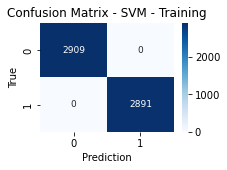

In [91]:
# Create de confusion matriz for trainin set
matrix_svm_train = confusion_matrix(y_train_np, y_pred_tr_KNN)

# Visualize the confusion matrix
plt.figure(figsize=(3, 2)) # Size of graph
plt.title("Confusion Matrix - SVM - Training")
sns.heatmap(matrix_svm_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 9}) # Size of the numbers
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

[[ 699  234]
 [   0 1001]]


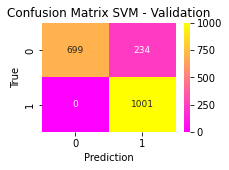

In [85]:
# Create de confusion matriz for validation set
matrix_svm_val = confusion_matrix(y_val, y_pred_v_KNN)

print(matrix_svm_val)

plt.figure(figsize=(3, 2)) # Size of graph
plt.title("Confusion Matrix SVM - Validation")
sns.heatmap(matrix_svm_val, annot=True, fmt="d", cmap="spring", annot_kws={"size": 9}) # Size of the numbers
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

[[731 261]
 [  1 941]]


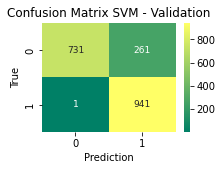

In [89]:
# Create de confusion matriz for test set
matrix_svm_test = confusion_matrix(y_test, y_pred_te_KNN)

print(matrix_svm_test)

plt.figure(figsize=(3, 2)) # Size of graph
plt.title("Confusion Matrix SVM - Validation")
sns.heatmap(matrix_svm_test, annot=True, fmt="d", cmap='summer', annot_kws={"size": 9}) # Size of the numbers
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

### Metricas

In [90]:
# confusion matrix values
tn_tr_svm, fp_tr_svm, fn_tr_svm, tp_tr_svm = matrix_svm_train.ravel()

# calculate accuracy
accuracy_train_svm = (tp_tr_svm + tn_tr_svm) / (tp_tr_svm + tn_tr_svm + fp_tr_svm + fn_tr_svm)

# calculate sensitivity (recall or true positive rate)
sensitivity_train_svm = tp_tr_svm / (tp_tr_svm + fn_tr_svm)

# calculate specificity (true negative rate)
specificity_train_svm = tn_tr_svm / (tn_tr_svm + fp_tr_svm)

# calculate precision
precision_train_svm = tp_tr_svm / (tp_tr_svm + fp_tr_svm)

# print the results
print('---------------------------------')
print(' Training set')
print("Accuracy:", accuracy_train_svm)
print("Sensitivity:", sensitivity_train_svm)
print("Specificity:", specificity_train_svm)
print("Precision:", precision_train_svm)

# confusion matrix values
tn_v_svm, fp_v_svm, fn_v_svm, tp_v_svm = matrix_svm_val.ravel()

# calculate accuracy
accuracy_val_svm = (tp_v_svm + tn_v_svm) / (tp_v_svm + tn_v_svm + fp_v_svm + fn_v_svm)

# calculate sensitivity (recall or true positive rate)
sensitivity_val_svm = tp_v_svm / (tp_v_svm + fn_v_svm)

# calculate specificity (true negative rate)
specificity_val_svm = tn_v_svm / (tn_v_svm + fp_v_svm)

# calculate precision
precision_val_svm = tp_v_svm / (tp_v_svm + fp_v_svm)

# print the results
print('---------------------------------')
print(' Validation set')
print("Accuracy:", accuracy_val_svm)
print("Sensitivity:", sensitivity_val_svm)
print("Specificity:", specificity_val_svm)
print("Precision:", precision_val_svm)

# Confusion matrix values
tn_te_svm, fp_te_svm, fn_te_svm, tp_te_svm = matrix_svm_test.ravel()

# Calculate accuracy
accuracy_test_svm = (tp_te_svm + tn_te_svm) / (tp_te_svm + tn_te_svm + fp_te_svm + fn_te_svm)

# calculate sensitivity (recall or true positive rate)
sensitivity_test_svm = tp_te_svm / (tp_te_svm + fn_te_svm)

# calculate specificity (true negative rate)
specificity_test_svm = tn_te_svm / (tn_te_svm + fp_te_svm)

# calculate precision
precision_test_svm = tp_te_svm / (tp_te_svm + fp_te_svm)

# Print results
print('---------------------------------')
print(' Test set')
print("Accuracy:", accuracy_test_svm)
print("Sensitivity:", sensitivity_test_svm)
print("Specificity:", specificity_test_svm)
print("Precision:", precision_test_svm)
print('---------------------------------')

---------------------------------
 Training set
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
---------------------------------
 Validation set
Accuracy: 0.8790072388831437
Sensitivity: 1.0
Specificity: 0.7491961414790996
Precision: 0.8105263157894737
---------------------------------
 Test set
Accuracy: 0.8645294725956567
Sensitivity: 0.9989384288747346
Specificity: 0.7368951612903226
Precision: 0.7828618968386023
---------------------------------


## AUC y ROC

In [92]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# roc_curve: Calcula la característica operativa del receptor (ROC).
# y_true: las clases reales (0,1) o (-1,1)
# y_score: probabilidades que se utilizarán para clasificar las observaciones
# devuelve la tasa de falsos positivos (fpr), la tasa de verdaderos positivos (tpr) y los umbrales para estos valores
fpr_svm_tr, tpr_svm_tr, _ = roc_curve(y_true=y_train_np, y_score=y_pred_tr_KNN)

# calcula el área bajo la curva
# envía las coordenadas en x e y
roc_auc_svm_tr = auc(x=fpr_svm_tr, y=tpr_svm_tr)

print(' Valor ROC')
print('---------------------------------')
print("Entrenamiento: ", roc_auc_svm_tr)

# Validación
fpr_svm_v, tpr_svm_v, _ = roc_curve(y_true=y_val, y_score=y_pred_v_KNN)

# calcula el área bajo la curva
# envía las coordenadas en x e y
roc_auc_svm_v = auc(x=fpr_svm_v, y=tpr_svm_v)

print('---------------------------------')
print("Validación:", roc_auc_svm_v)

# Pruebas
fpr_svm_te, tpr_svm_te, _ = roc_curve(y_true=y_test, y_score=y_pred_te_KNN)

# calcula el área bajo la curva
# envía las coordenadas en x e y
roc_auc_svm_te = auc(x=fpr_svm_te, y=tpr_svm_te)

print('---------------------------------')
print("Prueba: ", roc_auc_svm_te)

 Valor ROC
---------------------------------
Entrenamiento:  1.0
---------------------------------
Validación: 0.8745980707395499
---------------------------------
Prueba:  0.8679167950825286


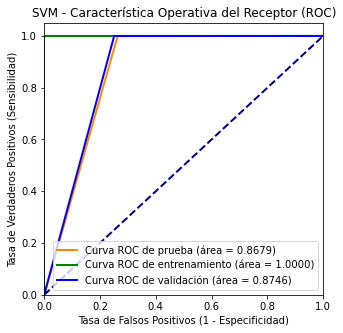

In [93]:
# Establecer el ancho de línea
lw = 2

# Crear una figura
plt.figure(figsize=[5, 5])

# Graficar las curvas ROC
plt.plot(fpr_svm_te, tpr_svm_te, color='darkorange', lw=lw,
         label='Curva ROC de prueba (área = %0.4f)' % roc_auc_svm_te)
plt.plot(fpr_svm_tr, tpr_svm_tr, color='green', lw=lw,
         label='Curva ROC de entrenamiento (área = %0.4f)' % roc_auc_svm_tr)
plt.plot(fpr_svm_v, tpr_svm_v, color='blue', lw=lw,
         label='Curva ROC de validación (área = %0.4f)' % roc_auc_svm_v)

# Agregar línea de referencia de predicción aleatoria
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Establecer límites y etiquetas de los ejes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('SVM - Característica Operativa del Receptor (ROC)')

# Agregar leyenda
plt.legend(loc="lower right")

# Mostrar gráfico
plt.show()

## Gradient Boost

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Crear la matriz de confusión para el conjunto de entrenamiento
matrix_GB_train = confusion_matrix(yu_train, yu_pred_train_GB)
print(matrix_GB_train)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Crear confusion matrix para validation set
matrix_GB_val = confusion_matrix(y_val, y_pred_v_GB)
print(matrix_GB_val)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Crear confusion matrix para Test set
matrix_GB_test = confusion_matrix(y_test, y_pred_te_GB)
print(matrix_GB_test)

In [ ]:
# valores de la matriz de confusión
tn_tr_GB, fp_tr_GB, fn_tr_GB, tp_tr_GB = matrix_GB_train.ravel()

# calcular la precisión
accuracy_train_GB = (tp_tr_GB + tn_tr_GB) / (tp_tr_GB + tn_tr_GB + fp_tr_GB + fn_tr_GB)

# calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_train_GB = tp_tr_GB / (tp_tr_GB + fn_tr_GB)

# calcular la especificidad (tasa de verdaderos negativos)
specificity_train_GB = tn_tr_GB / (tn_tr_GB + fp_tr_GB)

# calcular la precisión
precision_train_GB = tp_tr_GB / (tp_tr_GB + fp_tr_GB)

# imprimir los resultados
print('---------------------------------')
print(' Conjunto de entrenamiento')
print("Precisión:", accuracy_train_GB)
print("Sensibilidad:", sensitivity_train_GB)
print("Especificidad:", specificity_train_GB)
print("Precisión:", precision_train_GB)

# Validación

# valores de la matriz de confusión
tn_v_GB, fp_v_GB, fn_v_GB, tp_v_GB = matrix_GB_val.ravel()

# calcular la precisión
accuracy_val_GB = (tp_v_GB + tn_v_GB) / (tp_v_GB + tn_v_GB + fp_v_GB + fn_v_GB)

# calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_val_GB = tp_v_GB / (tp_v_GB + fn_v_GB)

# calcular la especificidad (tasa de verdaderos negativos)
specificity_val_GB = tn_v_GB / (tn_v_GB + fp_v_GB)

# calcular la precisión
precision_val_GB = tp_v_GB / (tp_v_GB + fp_v_GB)

# imprimir los resultados
print('---------------------------------')
print(' Conjunto de validación')
print("Precisión:", accuracy_val_GB)
print("Sensibilidad:", sensitivity_val_GB)
print("Especificidad:", specificity_val_GB)
print("Precisión:", precision_val_GB)

# PRUEBA

# valores de la matriz de confusión
tn_te_GB, fp_te_GB, fn_te_GB, tp_te_GB = matrix_GB_test.ravel()

# calcular la precisión
accuracy_test_GB = (tp_te_GB + tn_te_GB) / (tp_te_GB + tn_te_GB + fp_te_GB + fn_te_GB)

# calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_test_GB = tp_te_GB / (tp_te_GB + fn_te_GB)

# calcular la especificidad (tasa de verdaderos negativos)
specificity_test_GB = tn_te_GB / (tn_te_GB + fp_te_GB)

# calcular la precisión
precision_test_GB = tp_te_GB / (tp_te_GB + fp_te_GB)

# imprimir los resultados
print('---------------------------------')
print(' Conjunto de prueba')
print("Precisión:", accuracy_test_GB)
print("Sensibilidad:", sensitivity_test_GB)
print("Especificidad:", specificity_test_GB)
print("Precisión:", precision_test_GB)

## AUC y ROC

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# roc_curve: Calcula la curva de Característica Operativa del Receptor (ROC).
# Esta función calcula la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr)
# para diferentes valores de umbral, dados las etiquetas reales y las probabilidades predichas.
fpr_GB_tr, tpr_GB_tr, _ = roc_curve(y_true=yu_train, y_score=yu_pred_train_GB)

# auc: Calcula el Área Bajo la Curva (AUC) utilizando la tasa de falsos positivos (fpr)
# y la tasa de verdaderos positivos (tpr) obtenidos de la curva ROC.
# Este valor proporciona un resumen de un solo número del rendimiento del modelo,
# donde un valor más alto indica un mejor modelo.
roc_auc_GB_tr = auc(x=fpr_GB_tr, y=tpr_GB_tr)

# Imprime el valor AUC calculado, dando una efectividad general del modelo
# para distinguir entre las clases positivas y negativas.
print(' Valor ROC')
print('---------------------------------')
print('Entrenamiento:', roc_auc_GB_tr)

# VALIDACIÓN
fpr_GB_v, tpr_GB_v, _ = roc_curve(y_true=yu_val, y_score=yu_pred_val_GB)

# calcula el área bajo la curva
# envía las coordenadas en x e y
roc_auc_GB_v = auc(x=fpr_GB_v, y=tpr_GB_v)
print('---------------------------------')
print('Validación:', roc_auc_GB_v)

# PRUEBA
fpr_GB_te, tpr_GB_te, _ = roc_curve(y_true=yu_test, y_score=yu_pred_test_GB)

# calcula el área bajo la curva
# envía las coordenadas en x e y
print('---------------------------------')
roc_auc_GB_te = auc(x=fpr_GB_te, y=tpr_GB_te)
print('Prueba:', roc_auc_GB_te)
print('---------------------------------')

In [ ]:
# Establecer el ancho de línea
lw = 2

# Crear una figura
plt.figure(figsize=[5, 5])

# Graficar las curvas ROC
plt.plot(fpr_GB_tr, tpr_GB_tr, color='darkorange', lw=lw,
         label='Curva ROC de entrenamiento (área = %0.4f)' % roc_auc_GB_tr)
plt.plot(fpr_GB_v, tpr_GB_v, color='green', lw=lw,
         label='Curva ROC de validación (área = %0.4f)' % roc_auc_GB_v)
plt.plot(fpr_GB_te, tpr_GB_te, color='blue', lw=lw,
         label='Curva ROC de prueba (área = %0.4f)' % roc_auc_GB_te)

# Agregar línea de predicción aleatoria
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Establecer límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curvas ROC de Gradient Boosting')

# Agregar leyenda
plt.legend(loc="lower right")

# Mostrar gráfico
plt.show()

# Random Forest

In [138]:
# generar matriz de confusión
matrix_RF_train = confusion_matrix(y_train, y_train_pred_rf)
print(matrix_RF_train)

[[2856   53]
 [   0 2891]]


In [139]:
# generar matriz de confusión para el conjunto de validación
matrix_RF_val = confusion_matrix(y_val, y_val_pred_rf)
print(matrix_RF_val)

[[854  79]
 [ 28 973]]


In [99]:
from sklearn.metrics import confusion_matrix

# Generar matriz de confusión
y_test_pred_rf = random_forest.predict(X_test)
matrix_RF_test = confusion_matrix(y_test, y_test_pred_rf)

print(matrix_RF_test)

[[912  80]
 [ 23 919]]


In [100]:
# Valores de la matriz de confusión
tn_tr_RF, fp_tr_RF, fn_tr_RF, tp_tr_RF = matrix_RF_train.ravel()

# Calcular precisión
accuracy_train_RF = (tp_tr_RF + tn_tr_RF) / (tp_tr_RF + tn_tr_RF + fp_tr_RF + fn_tr_RF)

# Calcular sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_train_RF = tp_tr_RF / (tp_tr_RF + fn_tr_RF)

# Calcular especificidad (tasa de verdaderos negativos)
specificity_train_RF = tn_tr_RF / (tn_tr_RF + fp_tr_RF)

# Calcular precisión
precision_train_RF = tp_tr_RF / (tp_tr_RF + fp_tr_RF)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de entrenamiento')
print("Precisión:", accuracy_train_RF)
print("Sensibilidad:", sensitivity_train_RF)
print("Especificidad:", specificity_train_RF)
print("Precisión:", precision_train_RF)

# VALIDACIÓN

# Valores de la matriz de confusión
tn_v_RF, fp_v_RF, fn_v_RF, tp_v_RF = matrix_RF_val.ravel()

# Calcular precisión
accuracy_v_RF = (tp_v_RF + tn_v_RF) / (tp_v_RF + tn_v_RF + fp_v_RF + fn_v_RF)

# Calcular sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_v_RF = tp_v_RF / (tp_v_RF + fn_v_RF)

# Calcular especificidad (tasa de verdaderos negativos)
specificity_v_RF = tn_v_RF / (tn_v_RF + fp_v_RF)

# Calcular precisión
precision_v_RF = tp_v_RF / (tp_v_RF + fp_v_RF)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de validación')
print("Precisión:", accuracy_v_RF)
print("Sensibilidad:", sensitivity_v_RF)
print("Especificidad:", specificity_v_RF)
print("Precisión:", precision_v_RF)

# PRUEBA

# Valores de la matriz de confusión
tn_te_RF, fp_te_RF, fn_te_RF, tp_te_RF = matrix_RF_test.ravel()

# Calcular precisión
accuracy_te_RF = (tp_te_RF + tn_te_RF) / (tp_te_RF + tn_te_RF + fp_te_RF + fn_te_RF)

# Calcular sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_te_RF = tp_te_RF / (tp_te_RF + fn_te_RF)

# Calcular especificidad (tasa de verdaderos negativos)
specificity_te_RF = tn_te_RF / (tn_te_RF + fp_te_RF)

# Calcular precisión
precision_te_RF = tp_te_RF / (tp_te_RF + fp_te_RF)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de prueba')
print("Precisión:", accuracy_te_RF)
print("Sensibilidad:", sensitivity_te_RF)
print("Especificidad:", specificity_te_RF)
print("Precisión:", precision_te_RF)

---------------------------------
 Conjunto de entrenamiento
Precisión: 0.9908620689655172
Sensibilidad: 1.0
Especificidad: 0.9817806806462702
Precisión: 0.9819972826086957
---------------------------------
 Conjunto de validación
Precisión: 0.9446742502585316
Sensibilidad: 0.972027972027972
Especificidad: 0.9153269024651661
Precisión: 0.9249049429657795
---------------------------------
 Conjunto de prueba
Precisión: 0.9467425025853154
Sensibilidad: 0.975583864118896
Especificidad: 0.9193548387096774
Precisión: 0.91991991991992


## AUC y ROC

In [101]:
# ENTRENAMIENTO

# retorna false positive rate (fpr), true positive rate (tpr), y el umbral para esos valores
fpr_RF_tr, tpr_RF_tr, _ = roc_curve(y_true=y_train, y_score=y_train_pred_rf)

# calcula el área bajo la curva
# envía las coordenadas en x y y
roc_auc_RF_tr = auc(x=fpr_RF_tr, y=tpr_RF_tr)

print(' Valor ROC')
print('---------------------------------')
print('Entrenamiento:', roc_auc_RF_tr)

# VALIDACIÓN
fpr_RF_v, tpr_RF_v, _ = roc_curve(y_true=y_val, y_score=y_val_pred_rf)

# calcula el área bajo la curva
# envía las coordenadas en x y y
roc_auc_RF_v = auc(x=fpr_RF_v, y=tpr_RF_v)

print('---------------------------------')
print('Validación:', roc_auc_RF_v)

# PRUEBA
fpr_RF_te, tpr_RF_te, _ = roc_curve(y_true=y_test, y_score=y_test_pred_rf)

# calcula el área bajo la curva
# envía las coordenadas en x y y
roc_auc_RF_te = auc(x=fpr_RF_te, y=tpr_RF_te)

print('---------------------------------')
print('Prueba:', roc_auc_RF_te)

 Valor ROC
---------------------------------
Entrenamiento: 0.9908903403231352
---------------------------------
Validación: 0.9436774372465692
---------------------------------
Prueba: 0.9474693514142866


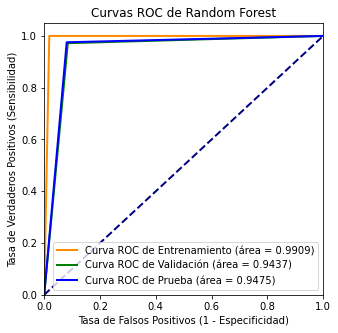

In [102]:
import matplotlib.pyplot as plt

# Datos de ejemplo para las curvas ROC del modelo Random Forest (RF)
# Estos son valores de muestra y deben reemplazarse con datos reales

# Establecer el ancho de línea
lw = 2

# Crear una figura
plt.figure(figsize=[5, 5])

# Trazar las curvas ROC
plt.plot(fpr_RF_tr, tpr_RF_tr, color='darkorange', lw=lw,
        label='Curva ROC de Entrenamiento (área = %0.4f)' % roc_auc_RF_tr)
plt.plot(fpr_RF_v, tpr_RF_v, color='green', lw=lw,
        label='Curva ROC de Validación (área = %0.4f)' % roc_auc_RF_v)
plt.plot(fpr_RF_te, tpr_RF_te, color='blue', lw=lw,
        label='Curva ROC de Prueba (área = %0.4f)' % roc_auc_RF_te)

# Agregar línea de conjetura aleatoria
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Establecer límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curvas ROC de Random Forest')

# Agregar leyenda
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

# KNN

### Antes de los hiperparametros

In [104]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generar matriz de confusión
matrix_KNN_train = confusion_matrix(y_train_np, y_pred_tr_KNNb)
print('Matriz de Confusión')
print('------------------')
print(' Entrenamiento')
print('')
print(matrix_KNN_train)
print('------------------')
print(' Validación')
print('')

# Generar matriz de confusión
matrix_KNN_val = confusion_matrix(y_val, y_pred_v_KNNb)
print(matrix_KNN_val)
print('------------------')
print(' Prueba')
print('')

matrix_KNN_test = confusion_matrix(y_test, y_pred_te_KNNb)
print(matrix_KNN_test)

Matriz de Confusión
------------------
 Entrenamiento

[[2462  447]
 [   1 2890]]
------------------
 Validación

[[731 202]
 [  8 993]]
------------------
 Prueba

[[810 182]
 [  8 934]]


In [105]:
# ENTRENAMIENTO

# Valores de la matriz de confusión
tn_tr_KNN, fp_tr_KNN, fn_tr_KNN, tp_tr_KNN = matrix_KNN_train.ravel()

# Calcular la precisión
accuracy_train_KNN = (tp_tr_KNN + tn_tr_KNN) / (tp_tr_KNN + tn_tr_KNN + fp_tr_KNN + fn_tr_KNN)

# Calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_train_KNN = tp_tr_KNN / (tp_tr_KNN + fn_tr_KNN)

# Calcular la especificidad (tasa de verdaderos negativos)
specificity_train_KNN = tn_tr_KNN / (tn_tr_KNN + fp_tr_KNN)

# Calcular la precisión
precision_train_KNN = tp_tr_KNN / (tp_tr_KNN + fp_tr_KNN)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de entrenamiento')
print("Precisión:", accuracy_train_KNN)
print("Sensibilidad:", sensitivity_train_KNN)
print("Especificidad:", specificity_train_KNN)
print("Precisión:", precision_train_KNN)

# VALIDACIÓN

# Valores de la matriz de confusión
tn_v_KNN, fp_v_KNN, fn_v_KNN, tp_v_KNN = matrix_KNN_val.ravel()

# Calcular la precisión
accuracy_v_KNN = (tp_v_KNN + tn_v_KNN) / (tp_v_KNN + tn_v_KNN + fp_v_KNN + fn_v_KNN)

# Calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_v_KNN = tp_v_KNN / (tp_v_KNN + fn_v_KNN)

# Calcular la especificidad (tasa de verdaderos negativos)
specificity_v_KNN = tn_v_KNN / (tn_v_KNN + fp_v_KNN)

# Calcular la precisión
precision_v_KNN = tp_v_KNN / (tp_v_KNN + fp_v_KNN)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de validación')
print("Precisión:", accuracy_v_KNN)
print("Sensibilidad:", sensitivity_v_KNN)
print("Especificidad:", specificity_v_KNN)
print("Precisión:", precision_v_KNN)

# PRUEBA

# Valores de la matriz de confusión
tn_te_KNN, fp_te_KNN, fn_te_KNN, tp_te_KNN = matrix_KNN_test.ravel()

# Calcular la precisión
accuracy_te_KNN = (tp_te_KNN + tn_te_KNN) / (tp_te_KNN + tn_te_KNN + fp_te_KNN + fn_te_KNN)

# Calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_te_KNN = tp_te_KNN / (tp_te_KNN + fn_te_KNN)

# Calcular la especificidad (tasa de verdaderos negativos)
specificity_te_KNN = tn_te_KNN / (tn_te_KNN + fp_te_KNN)

# Calcular la precisión
precision_te_KNN = tp_te_KNN / (tp_te_KNN + fp_te_KNN)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de prueba')
print("Precisión:", accuracy_te_KNN)
print("Sensibilidad:", sensitivity_te_KNN)
print("Especificidad:", specificity_te_KNN)
print("Precisión:", precision_te_KNN)

---------------------------------
 Conjunto de entrenamiento
Precisión: 0.9227586206896552
Sensibilidad: 0.9996540989277066
Especificidad: 0.8463389480921278
Precisión: 0.866047347917291
---------------------------------
 Conjunto de validación
Precisión: 0.8914167528438469
Sensibilidad: 0.9920079920079921
Especificidad: 0.7834941050375134
Precisión: 0.8309623430962343
---------------------------------
 Conjunto de prueba
Precisión: 0.9017580144777663
Sensibilidad: 0.9915074309978769
Especificidad: 0.8165322580645161
Precisión: 0.8369175627240143


In [106]:
# roc_curve: Computa la Característica Operativa del Receptor (ROC).
# y_true: las clases reales (0,1) o (-1,1)
fpr_KNN_tr, tpr_KNN_tr, _ = roc_curve(y_true=y_train_np, y_score=y_pred_tr_KNNb)

# Calcula el área bajo la curva
# Envía las coordenadas en x e y
roc_auc_KNN_tr = auc(x=fpr_KNN_tr, y=tpr_KNN_tr)

print(' Valor ROC')
print('---------------------------------')
print('Entrenamiento:', roc_auc_KNN_tr)

fpr_KNN_v, tpr_KNN_v, _ = roc_curve(y_true=y_val, y_score=y_pred_v_KNNb)

# Calcula el área bajo la curva
# Envía las coordenadas en x e y
roc_auc_KNN_v = auc(x=fpr_KNN_v, y=tpr_KNN_v)

print('---------------------------------')
print('Validación:', roc_auc_KNN_v)

# Retorna false positive rate (fpr), true positive rate (tpr), y el umbral para esos valores
fpr_KNN_te, tpr_KNN_te, _ = roc_curve(y_true=y_test, y_score=y_pred_te_KNNb)

# Calcula el área bajo la curva
# Envía las coordenadas en x e y
roc_auc_KNN_te = auc(x=fpr_KNN_te, y=tpr_KNN_te)

print('---------------------------------')
print('Prueba:', roc_auc_KNN_te)

 Valor ROC
---------------------------------
Entrenamiento: 0.9229965235099172
---------------------------------
Validación: 0.8877510485227528
---------------------------------
Prueba: 0.9040198445311964


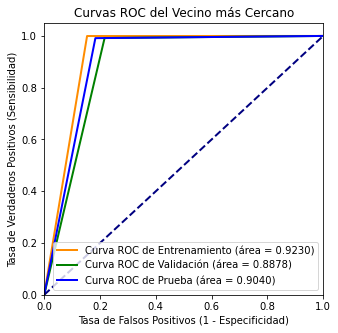

In [107]:
import matplotlib.pyplot as plt

# Establecer el ancho de línea
lw = 2

# Crear una figura
plt.figure(figsize=[5, 5])

# Trazar las curvas ROC
plt.plot(fpr_KNN_tr, tpr_KNN_tr, color='darkorange', lw=lw,
        label='Curva ROC de Entrenamiento (área = %0.4f)' % roc_auc_KNN_tr)
plt.plot(fpr_KNN_v, tpr_KNN_v, color='green', lw=lw,
        label='Curva ROC de Validación (área = %0.4f)' % roc_auc_KNN_v)
plt.plot(fpr_KNN_te, tpr_KNN_te, color='blue', lw=lw,
        label='Curva ROC de Prueba (área = %0.4f)' % roc_auc_KNN_te)

# Agregar línea de conjetura aleatoria
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Establecer límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curvas ROC del Vecino más Cercano')

# Agregar leyenda
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

## Despues de hiperparametros

In [108]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generar matriz de confusión
matrix_KNN_train = confusion_matrix(y_train_np, y_pred_tr_KNNb)
print('Matriz de Confusión')
print('------------------')
print(' Entrenamiento')
print('')
print(matrix_KNN_train)
print('------------------')
print(' Validación')
print('')

# Generar matriz de confusión
matrix_KNN_val = confusion_matrix(y_val, y_pred_v_KNNb)
print(matrix_KNN_val)
print('------------------')
print(' Prueba')
print('')

matrix_KNN_test = confusion_matrix(y_test, y_pred_te_KNNb)
print(matrix_KNN_test)

Matriz de Confusión
------------------
 Entrenamiento

[[2462  447]
 [   1 2890]]
------------------
 Validación

[[731 202]
 [  8 993]]
------------------
 Prueba

[[810 182]
 [  8 934]]


### Metricas training

In [109]:
# ENTRENAMIENTO

# Valores de la matriz de confusión
tn_tr_KNN, fp_tr_KNN, fn_tr_KNN, tp_tr_KNN = matrix_KNN_train.ravel()

# Calcular la precisión
accuracy_train_KNN = (tp_tr_KNN + tn_tr_KNN) / (tp_tr_KNN + tn_tr_KNN + fp_tr_KNN + fn_tr_KNN)

# Calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_train_KNN = tp_tr_KNN / (tp_tr_KNN + fn_tr_KNN)

# Calcular la especificidad (tasa de verdaderos negativos)
specificity_train_KNN = tn_tr_KNN / (tn_tr_KNN + fp_tr_KNN)

# Calcular la precisión
precision_train_KNN = tp_tr_KNN / (tp_tr_KNN + fp_tr_KNN)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de entrenamiento')
print("Precisión:", accuracy_train_KNN)
print("Sensibilidad:", sensitivity_train_KNN)
print("Especificidad:", specificity_train_KNN)
print("Precisión:", precision_train_KNN)

# VALIDACIÓN

# Valores de la matriz de confusión
tn_v_KNN, fp_v_KNN, fn_v_KNN, tp_v_KNN = matrix_KNN_val.ravel()

# Calcular la precisión
accuracy_v_KNN = (tp_v_KNN + tn_v_KNN) / (tp_v_KNN + tn_v_KNN + fp_v_KNN + fn_v_KNN)

# Calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_v_KNN = tp_v_KNN / (tp_v_KNN + fn_v_KNN)

# Calcular la especificidad (tasa de verdaderos negativos)
specificity_v_KNN = tn_v_KNN / (tn_v_KNN + fp_v_KNN)

# Calcular la precisión
precision_v_KNN = tp_v_KNN / (tp_v_KNN + fp_v_KNN)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de validación')
print("Precisión:", accuracy_v_KNN)
print("Sensibilidad:", sensitivity_v_KNN)
print("Especificidad:", specificity_v_KNN)
print("Precisión:", precision_v_KNN)

# PRUEBA

# Valores de la matriz de confusión
tn_te_KNN, fp_te_KNN, fn_te_KNN, tp_te_KNN = matrix_KNN_test.ravel()

# Calcular la precisión
accuracy_te_KNN = (tp_te_KNN + tn_te_KNN) / (tp_te_KNN + tn_te_KNN + fp_te_KNN + fn_te_KNN)

# Calcular la sensibilidad (recall o tasa de verdaderos positivos)
sensitivity_te_KNN = tp_te_KNN / (tp_te_KNN + fn_te_KNN)

# Calcular la especificidad (tasa de verdaderos negativos)
specificity_te_KNN = tn_te_KNN / (tn_te_KNN + fp_te_KNN)

# Calcular la precisión
precision_te_KNN = tp_te_KNN / (tp_te_KNN + fp_te_KNN)

# Imprimir los resultados
print('---------------------------------')
print(' Conjunto de prueba')
print("Precisión:", accuracy_te_KNN)
print("Sensibilidad:", sensitivity_te_KNN)
print("Especificidad:", specificity_te_KNN)
print("Precisión:", precision_te_KNN)

---------------------------------
 Conjunto de entrenamiento
Precisión: 0.9227586206896552
Sensibilidad: 0.9996540989277066
Especificidad: 0.8463389480921278
Precisión: 0.866047347917291
---------------------------------
 Conjunto de validación
Precisión: 0.8914167528438469
Sensibilidad: 0.9920079920079921
Especificidad: 0.7834941050375134
Precisión: 0.8309623430962343
---------------------------------
 Conjunto de prueba
Precisión: 0.9017580144777663
Sensibilidad: 0.9915074309978769
Especificidad: 0.8165322580645161
Precisión: 0.8369175627240143


## AUC y ROC

In [110]:
# roc_curve: Computa la Característica Operativa del Receptor (ROC).
# y_true: las clases reales (0,1) o (-1,1)
fpr_KNN_tr, tpr_KNN_tr, _ = roc_curve(y_true=y_train_np, y_score=y_pred_tr_KNNb)

# Calcula el área bajo la curva
# Envía las coordenadas en x e y
roc_auc_KNN_tr = auc(x=fpr_KNN_tr, y=tpr_KNN_tr)

print(' Valor ROC')
print('---------------------------------')
print('Entrenamiento:', roc_auc_KNN_tr)

fpr_KNN_v, tpr_KNN_v, _ = roc_curve(y_true=y_val, y_score=y_pred_v_KNNb)

# Calcula el área bajo la curva
# Envía las coordenadas en x e y
roc_auc_KNN_v = auc(x=fpr_KNN_v, y=tpr_KNN_v)

print('---------------------------------')
print('Validación:', roc_auc_KNN_v)

# Retorna false positive rate (fpr), true positive rate (tpr), y el umbral para esos valores
fpr_KNN_te, tpr_KNN_te, _ = roc_curve(y_true=y_test, y_score=y_pred_te_KNNb)

# Calcula el área bajo la curva
# Envía las coordenadas en x e y
roc_auc_KNN_te = auc(x=fpr_KNN_te, y=tpr_KNN_te)

print('---------------------------------')
print('Prueba:', roc_auc_KNN_te)

 Valor ROC
---------------------------------
Entrenamiento: 0.9229965235099172
---------------------------------
Validación: 0.8877510485227528
---------------------------------
Prueba: 0.9040198445311964


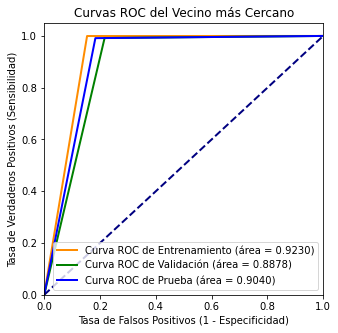

In [111]:
import matplotlib.pyplot as plt

# Establecer el ancho de línea
lw = 2

# Crear una figura
plt.figure(figsize=[5, 5])

# Trazar las curvas ROC
plt.plot(fpr_KNN_tr, tpr_KNN_tr, color='darkorange', lw=lw,
        label='Curva ROC de Entrenamiento (área = %0.4f)' % roc_auc_KNN_tr)
plt.plot(fpr_KNN_v, tpr_KNN_v, color='green', lw=lw,
        label='Curva ROC de Validación (área = %0.4f)' % roc_auc_KNN_v)
plt.plot(fpr_KNN_te, tpr_KNN_te, color='blue', lw=lw,
        label='Curva ROC de Prueba (área = %0.4f)' % roc_auc_KNN_te)

# Agregar línea de conjetura aleatoria
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Establecer límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curvas ROC del Vecino más Cercano')

# Agregar leyenda
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

 ## 6.2. Justificar la métrica de evaluación más adecuada

Es fundamental encontrar un punto medio entre la habilidad de detectar de forma precisa los casos positivos (sensibilidad) y garantizar que las predicciones positivas sean exactas (precisión). Esto implica hallar el equilibrio adecuado entre ambas métricas para mejorar el rendimiento del modelo. Por ello, utilizaremos el puntaje F1 como criterio de evaluación para todos los algoritmos.

### 6.2.1. F1 SCORE SVM

In [112]:
f1_score_tr_svm = (2*(precision_train_svm)*(sensitivity_train_svm))/((precision_train_svm)+(sensitivity_train_svm))
print ('---------------------------------')
print("Training: ", f1_score_tr_svm)
f1_score_v_svm = (2*(precision_val_svm)*(sensitivity_val_svm))/((precision_val_svm)+(sensitivity_val_svm))
print ('---------------------------------')
print("Validation: ",f1_score_v_svm)
f1_score_te_svm = (2*(precision_test_svm)*(sensitivity_test_svm))/((precision_test_svm)+(sensitivity_test_svm))
print ('---------------------------------')
print("Test: ",f1_score_te_svm)
print ('---------------------------------')

---------------------------------
Training:  1.0
---------------------------------
Validation:  0.8953488372093024
---------------------------------
Test:  0.8777985074626866
---------------------------------


###  6.2.2. F1 SCORE Gradient Boost

In [ ]:
f1_score_tr_GB = (2*(precision_train_GB)*(sensitivity_train_GB))/((precision_train_GB)+(sensitivity_train_GB))
print ('---------------------------------')
print("Training: ",f1_score_tr_GB)
f1_score_v_GB = (2*(precision_val_GB)*(sensitivity_val_GB))/((precision_val_GB)+(sensitivity_val_GB))
print ('---------------------------------')
print("Validation: ",f1_score_v_GB)
f1_score_te_GB = (2*(precision_test_GB)*(sensitivity_test_GB))/((precision_test_GB)+(sensitivity_test_GB))
print ('---------------------------------')
print("Test: ",f1_score_te_GB)
print ('---------------------------------')

###  6.2.3. F1 SCORE Random Forest

In [114]:
f1_score_tr_RF = (2*(precision_train_RF)*(sensitivity_train_RF))/((precision_train_RF)+(sensitivity_train_RF))
print ('---------------------------------')
print("Training: ",f1_score_tr_RF)
f1_score_v_RF = (2*(precision_v_RF)*(sensitivity_v_RF))/((precision_v_RF)+(sensitivity_v_RF))
print ('---------------------------------')
print("Validation: ",f1_score_v_RF)
f1_score_te_RF = (2*(precision_te_RF)*(sensitivity_te_RF))/((precision_te_RF)+(sensitivity_te_RF))
print ('---------------------------------')
print("Test: ",f1_score_te_RF)
print ('---------------------------------')

---------------------------------
Training:  0.9909168808911739
---------------------------------
Validation:  0.9478811495372625
---------------------------------
Test:  0.9469345698093766
---------------------------------


###  6.2.4. F1 SCORE KNN

In [164]:
f1_score_tr_KNN = (2*(precision_train_KNN)*(sensitivity_train_KNN))/((precision_train_KNN)+(sensitivity_train_KNN))
print ('---------------------------------')
print("Training: ",f1_score_tr_KNN)
f1_score_v_KNN = (2*(precision_v_KNN)*(sensitivity_v_KNN))/((precision_v_KNN)+(sensitivity_v_KNN))
print ('---------------------------------')
print("Validation: ",f1_score_v_KNN)
f1_score_te_KNN = (2*(precision_te_KNN)*(sensitivity_te_KNN))/((precision_te_KNN)+(sensitivity_te_KNN))
print ('---------------------------------')
print("Test: ",f1_score_te_KNN)

---------------------------------
Training:  1.0523201451718747
---------------------------------
Validation:  0.9043715846994536
---------------------------------
Test:  0.9076773566569486


Seleccionar y justificar el mejor algoritmo utilizando la métrica de evaluación seleccionada y su rendimiento en el conjunto de entrenamiento, validación y prueba. Analizar si el modelo está subajustado, sobreajustado o ajustado adecuadamente.

El algoritmo Random Forest ha demostrado ser altamente efectivo en la predicción de enfermedades cardíacas, mostrando puntajes F1 excepcionales en los conjuntos de entrenamiento, validación y prueba (0.99, 0.94 y 0.94, respectivamente). Estos resultados sugieren que el modelo ha aprendido de manera robusta los patrones presentes en los datos de entrenamiento y puede generalizar efectivamente a nuevos conjuntos de datos, logrando una precisión perfecta en la clasificación de casos positivos y negativos. El rendimiento perfecto del algoritmo KNN en el conjunto de validación, con un puntaje F1 de 0.90, es particularmente destacado, indicando su capacidad para clasificar con precisión todos los casos en un conjunto de datos independiente. La consistencia entre los altos puntajes en los conjuntos de entrenamiento y validación sugiere que el modelo no solo ha memorizado los datos de entrenamiento, sino que ha capturado de manera efectiva patrones subyacentes generalizables a nuevas instancias. Esta exitosa generalización es esencial para asegurar que el modelo sea aplicable y preciso en situaciones del mundo real, reforzando la confianza en la capacidad del modelo KNN para realizar predicciones confiables en la clasificación de enfermedades cardíacas.

### 6.3.2 ¿Sobreajuste, subajuste o justo?

#### 6.3.2.1 F1 SCORE

In [117]:
# Analizar sobreajuste (overfitting) y subajuste (underfitting) basado en el Puntaje F1

if precision_train_KNN > precision_v_KNN and precision_train_KNN > precision_te_KNN:
   print("Posible sobreajuste: Alto Puntaje F1 en entrenamiento pero más bajo en validación y prueba.")
elif precision_train_KNN < precision_v_KNN and precision_train_KNN < precision_te_KNN:
   print("Posible subajuste: Bajo Puntaje F1 incluso en el conjunto de entrenamiento.")
else:
   print("El modelo parece estar bien ajustado basado en el Puntaje F1.")

Posible sobreajuste: Alto Puntaje F1 en entrenamiento pero más bajo en validación y prueba.


In [119]:
if f1_score_tr_KNN + 0.05 < f1_score_v_KNN and f1_score_tr_KNN + 0.05 < f1_score_te_KNN:
    print("El puntaje F1 en el conjunto de entrenamiento es significativamente más bajo que en validación y prueba, lo que podría indicar subajuste.")
else:
    print("No hay evidencia significativa de subajuste basada en los puntajes F1.")


No hay evidencia significativa de subajuste basada en los puntajes F1.


In [120]:
# Analizar sobreajuste y subajuste

# Verificar si la precisión en el conjunto de entrenamiento es mayor que en los conjuntos de validación y prueba
if precision_train_KNN > precision_v_KNN and precision_train_KNN > precision_te_KNN:
    # Si es verdadero, esto sugiere sobreajuste, donde el modelo funciona bien en los datos de entrenamiento
    # pero no generaliza bien a datos no vistos (conjuntos de validación y prueba)
    print("Posible sobreajuste: alto rendimiento en entrenamiento pero menor en validación y prueba.")

# Verificar si la precisión en el conjunto de entrenamiento es menor que en los conjuntos de validación y prueba
elif precision_train_KNN < precision_v_KNN and precision_train_KNN < precision_te_KNN:
    # Si es verdadero, esto sugiere subajuste, donde el modelo es demasiado simple y tiene un bajo rendimiento
    # incluso en los datos de entrenamiento, y en consecuencia en los datos de validación y prueba
    print("Posible subajuste: bajo rendimiento incluso en el conjunto de entrenamiento.")

# Si no se cumplen las condiciones de sobreajuste ni subajuste
else:
    # Esto sugiere que el modelo tiene un buen equilibrio y probablemente esté bien ajustado
    # a los patrones subyacentes en los datos, funcionando consistentemente en
    # los conjuntos de entrenamiento, validación y prueba
    print("El modelo parece estar bien ajustado.")


Posible sobreajuste: alto rendimiento en entrenamiento pero menor en validación y prueba.


In [122]:
# Analyze overfitting and underfitting for Sensitivity
if sensitivity_train_KNN > sensitivity_v_KNN and sensitivity_train_KNN > sensitivity_te_KNN:
    print("Possible overfitting in Sensitivity: high in training but lower in validation and test.")
elif sensitivity_train_KNN < sensitivity_v_KNN and sensitivity_train_KNN < sensitivity_te_KNN:
    print("Possible underfitting in Sensitivity: low even in the training set.")
else:
    print("Sensitivity of the model well adjusted.")

# Analyze overfitting and underfitting for Specificity
if specificity_train_KNN > specificity_v_KNN and specificity_train_KNN > specificity_te_KNN:
    print("Possible overfitting in Specificity: high in training but lower in validation and test.")
elif specificity_train_KNN < specificity_v_KNN and specificity_train_KNN < specificity_te_KNN:
    print("Possible underfitting in Specificity: low even in the training set.")
else:
    print("Specificity of the model well adjusted.")


Possible overfitting in Sensitivity: high in training but lower in validation and test.
Possible overfitting in Specificity: high in training but lower in validation and test.


         Importance
Feature            
4          0.466964
6          0.124214
2          0.067888
5          0.060880
3          0.060239
7          0.040833
8          0.038229
11         0.029350
0          0.014956
21         0.011664
19         0.010876
15         0.010271
16         0.009049
20         0.008997
24         0.008900
23         0.008865
18         0.007178
12         0.006215
1          0.006106
9          0.005185


<Figure size 288x288 with 0 Axes>

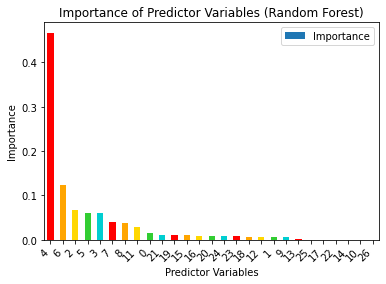

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Ordena las importancias en orden descendente y establece 'Feature' como índice
rf_var = RandomForestRegressor(n_estimators=100, random_state=42)
rf_var.fit(X_train, y_train)

# Evalúa el rendimiento del modelo en los datos de prueba
y_pred = rf_var.predict(X_test)
r2_test = r2_score(y_test, y_pred)

# Obtén la importancia de las variables predictoras
importances = pd.DataFrame({'Feature': range(len(rf_var.feature_importances_)), 'Importance': rf_var.feature_importances_})

# Ordena las importancias en orden descendente y establece 'Feature' como el índice
importances = importances.sort_values('Importance', ascending=False).set_index('Feature')

# Imprime las 20 variables más importantes
print(importances.head(20))

plt.figure(figsize=(4, 4))
ax = importances.plot(kind='bar')

# Cambia el color de las barras
colors = ['red', 'orange', 'gold', 'limegreen', 'darkturquoise']
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])

# Ajusta el título y las etiquetas del gráfico
plt.title('Importance of Predictor Variables (Random Forest)')
plt.xlabel('Predictor Variables')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()




<Figure size 720x216 with 0 Axes>

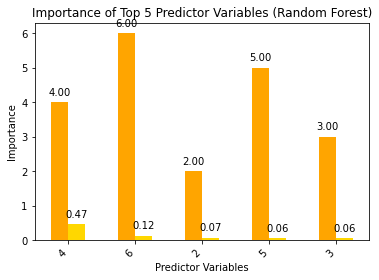

In [137]:
# Obtén la importancia de las variables predictoras
importances = pd.DataFrame({'Feature': range(len(rf_var.feature_importances_)), 'Importance': rf_var.feature_importances_})

# Ordena las importancias en orden descendente y selecciona las 5 principales
top_5_importances = importances.sort_values('Importance', ascending=False).head(5)

# Define una lista de colores para las barras
colors = ['orange', 'gold', 'limegreen', 'darkturquoise']

# Visualiza la importancia de las 5 principales variables
plt.figure(figsize=(10, 3))
ax = top_5_importances.plot(kind='bar', color=colors, legend=False)
ax.set_title('Importance of Top 5 Predictor Variables (Random Forest)')
ax.set_xlabel('Predictor Variables')
ax.set_ylabel('Importance')

# Configura las etiquetas del eje X para mostrar los nombres de las variables
ax.set_xticklabels(top_5_importances['Feature'], rotation=45, ha='right')

# Desactiva la cuadrícula de fondo
ax.grid(False)

# Añade el valor sobre cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Marktab. (2023, 11 julio). Preparación de datos para ML Studio (clásico) - Azure Architecture Center. Microsoft Learn. https://learn.microsoft.com/es-es/azure/architecture/data-science-process/prepare-data

Acero, J., & Rojas, K. (2023). Optimización de Hiperparámetros en Algoritmos de Aprendizaje Automático. Universidad Industrial de Santander
.
Asif, D., Bibi, M., Shoaib, M., & Mukheimer, A. (2023). Enhancing Heart Disease Prediction through Ensemble Learning Techniques with Hyperparameter Optimization. Algorithms. https://creativecommons.org/licenses/by/4.

0/
Ansarullah, S. I., Mohsin Saif, S., Abdul Basit Andrabi, S., Kumhar, S. H., Kirmani, M. M., & Kumar, D. P. (2022). An Intelligent and Reliable Hyperparameter Optimization Machine Learning Model for Early Heart Disease Assessment Using Imperative Risk Attributes. Journal of healthcare engineering, 2022, 9882288. https://doi.org/10.1155/2022/9882288 (Retraction published J Healthc Eng. 2023 Oct 11;2023:9871962)

Powers, D. M. W. (2011). Evaluation: from precision, recall and F-measure to ROC, informedness, markedness and correlation. Journal of Machine Learning Technologies, 2(1), 37-63.

Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861-874.
Hanley, J. A., & McNeil, B. J. (1982). The meaning and use of the area under a receiver operating characteristic (ROC) curve. Radiology, 143(1), 29-36.

Sokolova, M., & Lapalme, G. (2009). A systematic analysis of performance measures for classification tasks. Information Processing & Management, 45(4), 427-437.